# Bike Sharing Case Study:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


**Read the data**

In [4]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preprocessing

**Initial Look at the Bike Sharing Dataset**


In [5]:
print("Dataset Shape:", bike_df.shape)

Dataset Shape: (730, 16)


There are 16 Columns and 730 rows in the 'day.csv' having bike rental information

As per the problem statement  -"In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable." CNT is the targer and 'Casual' and 'Registered' might be inconsequential

**Lets take a look at bike sharing dataset datatypes to further pre-prep the data for analaysis**

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 *mnth*, *season*, *weekday* and *weathersit* are categorical in nature but the data but is showing as ordinals and need to be worked on

 Also from the problem statement- "

 *dteday* column seems redundant as it is explained by the other columns yr, month, holiday, weekday, workingday and can be dropped

**Basic dataset statsistics**

In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



*instant* column seems like a serial number and may not help in analysis and can be dropped


**Check dataset for duplicates**

In [8]:
duplicates = bike_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


**Check unique values of categorical columns since we know now they are not ordinals**


In [9]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}: {bike_df[col].unique()}")


Unique values in categorical columns:

season: [1 2 3 4]

yr: [0 1]

mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]

holiday: [0 1]

weekday: [6 0 1 2 3 4 5]

workingday: [0 1]

weathersit: [2 1 3]


**Reconforming there are no missing values**
Shows percentage of nulls in each column
Helps identify which features have missing data
Sorted in descending order helps prioritize columns that need attention
Using percentage instead of counts makes it more interpretable

In [10]:
# column wwise missing value check
round(100 * (bike_df.isnull().sum() / len(bike_df)), 2).sort_values(ascending = False)

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [11]:
# row wise missing value check, will include axis
round(100 * (bike_df.isnull().sum(axis = 1) / len(bike_df)), 2).sort_values(ascending = False)

,0
0,0.0
479,0.0
481,0.0
482,0.0
483,0.0
...,...
245,0.0
246,0.0
247,0.0
248,0.0


**create dataframe copy so we can revert for actions**


In [12]:
bike_share_df = bike_df.copy() # bike_share_df will be worked upon from now

**Convert weathersit to categorical**


In [13]:
# dictionary for mapping; this is retrived from the dictionary provided
weathersit_dict = {
    1: 'clear',
    2: 'mist',
    3: 'light_snow_rain',
    4: 'heavy_rain'
}

# before mapping
print(bike_share_df['weathersit'].value_counts())
# map  from dictionary
bike_share_df['weathersit'] = bike_share_df['weathersit'].map(weathersit_dict)
#confirm conversion
bike_share_df['weathersit'].value_counts()


weathersit
1    463
2    246
3     21
Name: count, dtype: int64


,count
weathersit,
clear,463
mist,246
light_snow_rain,21


**Convert month to categorical**

In [14]:
# disctionary for mapping
mnth_dict = {
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
    5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
    9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
}

# before mapping
print(bike_share_df['mnth'].value_counts())
# map  from dictionary
bike_share_df['mnth'] = bike_share_df['mnth'].map(mnth_dict)
#confirm conversion
bike_share_df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64


,count
mnth,
jan,62
mar,62
may,62
jul,62
aug,62
oct,62
dec,62
apr,60
jun,60


**convert weekday to categorical**

In [15]:
# dictionary for weekday
weekday_dict = {
    0: 'sunday',
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday'
}
# before mapping
print(bike_share_df['weekday'].value_counts())
# map  from dictionary
bike_share_df['weekday'] = bike_share_df['weekday'].map(weekday_dict)
#confirm conversion
bike_share_df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64


,count
weekday,
saturday,105
sunday,105
monday,105
tuesday,104
thursday,104
friday,104
wednesday,103


**convert season to categorical**

In [16]:
# dictionary for mapping; this is retrived from the dictonary provided

season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# before mapping
print(bike_share_df['season'].value_counts())
# map  from dictionary
bike_share_df['season'] = bike_share_df['season'].map(season_dict)
#confirm conversion
bike_share_df['season'].value_counts()


season
3    188
2    184
1    180
4    178
Name: count, dtype: int64


,count
season,
fall,188
summer,184
spring,180
winter,178


**Drop redundant columns**
1) dteday - yr, mnth, holiday, weekday, workingday  already provide this information hence redundant
2) instant - Is a serial number adds no value to data analysis hence redundant
3) casual and registered - since it available in target variable 'cnt' as mentioned in problem statement hene redundant

In [17]:
# dropping reundant columns
bike_share_df.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)
#rechecking df post dropping
print(f"\n Shape: {bike_share_df.shape}")



 Shape: (730, 12)


In [18]:
# rechecking dataframe after dropping columns/features
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis

**Univariate Analysis**



In [19]:
# Setting style

sns.set_palette("flare")

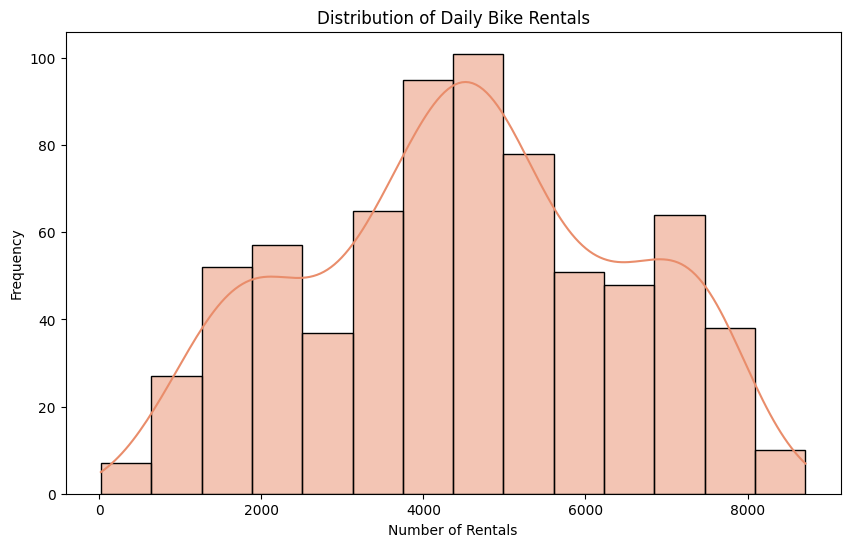

In [20]:
# lets check the distribution of target variable

plt.figure(figsize=(10, 6))
sns.histplot(bike_share_df['cnt'], kde=True)
plt.title('Distribution of Daily Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

Inferences:



*   Distribution as multiple peaks
*   May be possible distibution over weekdays and wekends; will get refined in further analysis
*   Most rentals are between 4000 and 5000 bikes






**Categorical variables analysis**

***Season based analysis***

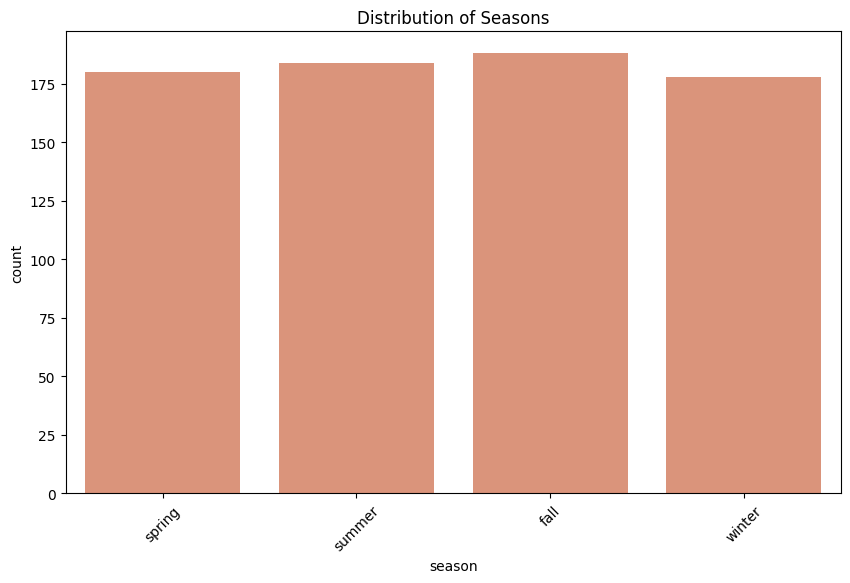

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bike_share_df, x='season')
plt.title('Distribution of Seasons')
plt.xticks(rotation=45)
plt.show()

Inferences:


*   Fairly even distribution across seasons?, need further analysis
*   A comparitive graph across multiple catergorical values might give more clarity in inferences



**Plot all categoricals in subplot for comparison**

<ipython-input-22-eb3be234c20a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_share_df, x='season', palette='husl')
<ipython-input-22-eb3be234c20a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_share_df, x='weathersit',palette='pastel')
<ipython-input-22-eb3be234c20a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bike_share_df, x='mnth',palette='inferno')
<ipython-input-22-eb3be234c20a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

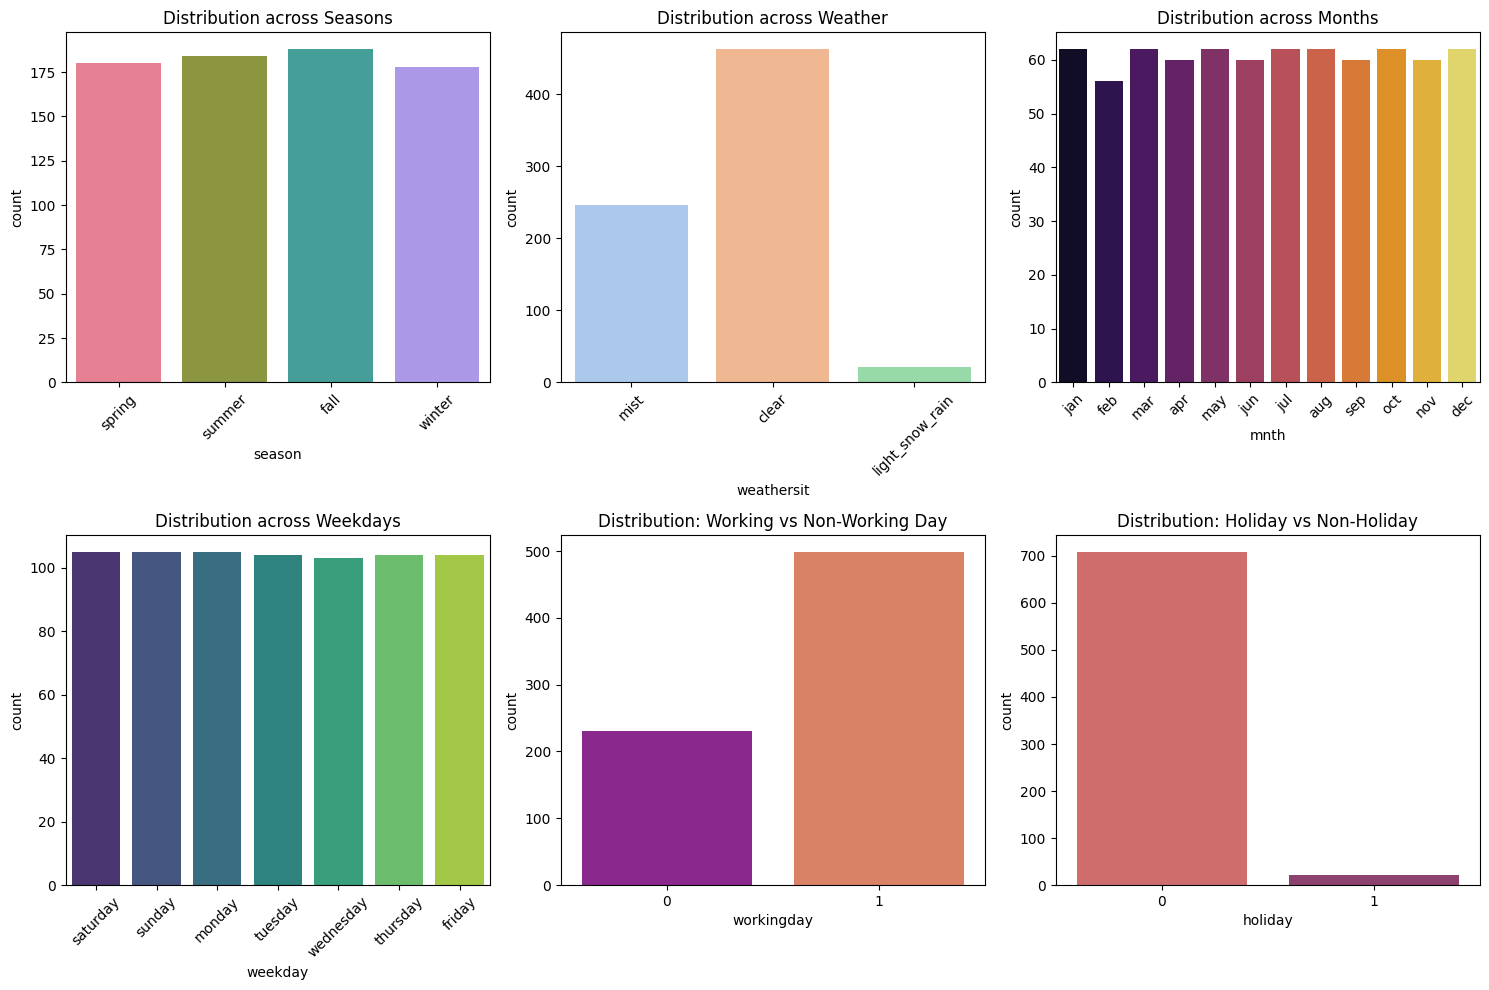

In [22]:
# subplotting for categoricals
plt.figure(figsize=(15, 10))

# subplots for all categorical variables
plt.subplot(2, 3, 1)
sns.countplot(data=bike_share_df, x='season', palette='husl')
plt.title('Distribution across Seasons')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.countplot(data=bike_share_df, x='weathersit',palette='pastel')
plt.title('Distribution across Weather')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.countplot(data=bike_share_df, x='mnth',palette='inferno')
plt.title('Distribution across Months')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.countplot(data=bike_share_df, x='weekday',palette='viridis')
plt.title('Distribution across Weekdays')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(data=bike_share_df, x='workingday', palette='plasma')
plt.title('Distribution: Working vs Non-Working Day')

plt.subplot(2, 3, 6)
sns.countplot(data=bike_share_df, x='holiday',palette='flare')
plt.title('Distribution: Holiday vs Non-Holiday')

plt.tight_layout()
plt.show()

Infrences:

Weather Impact:
   - Clear weather days show consistently higher rentals
   - Plan maintenance on bad weather days
   - Marketing should focus on good weather days

Month Imapct:
   - Summer months show a slight increase in rentals; this must be correlated with other data to figure out why

Weekends Impact:
*   It isnt clear yet if there is a difference between weekend vs weekday




**Plot all numericals in subplots**

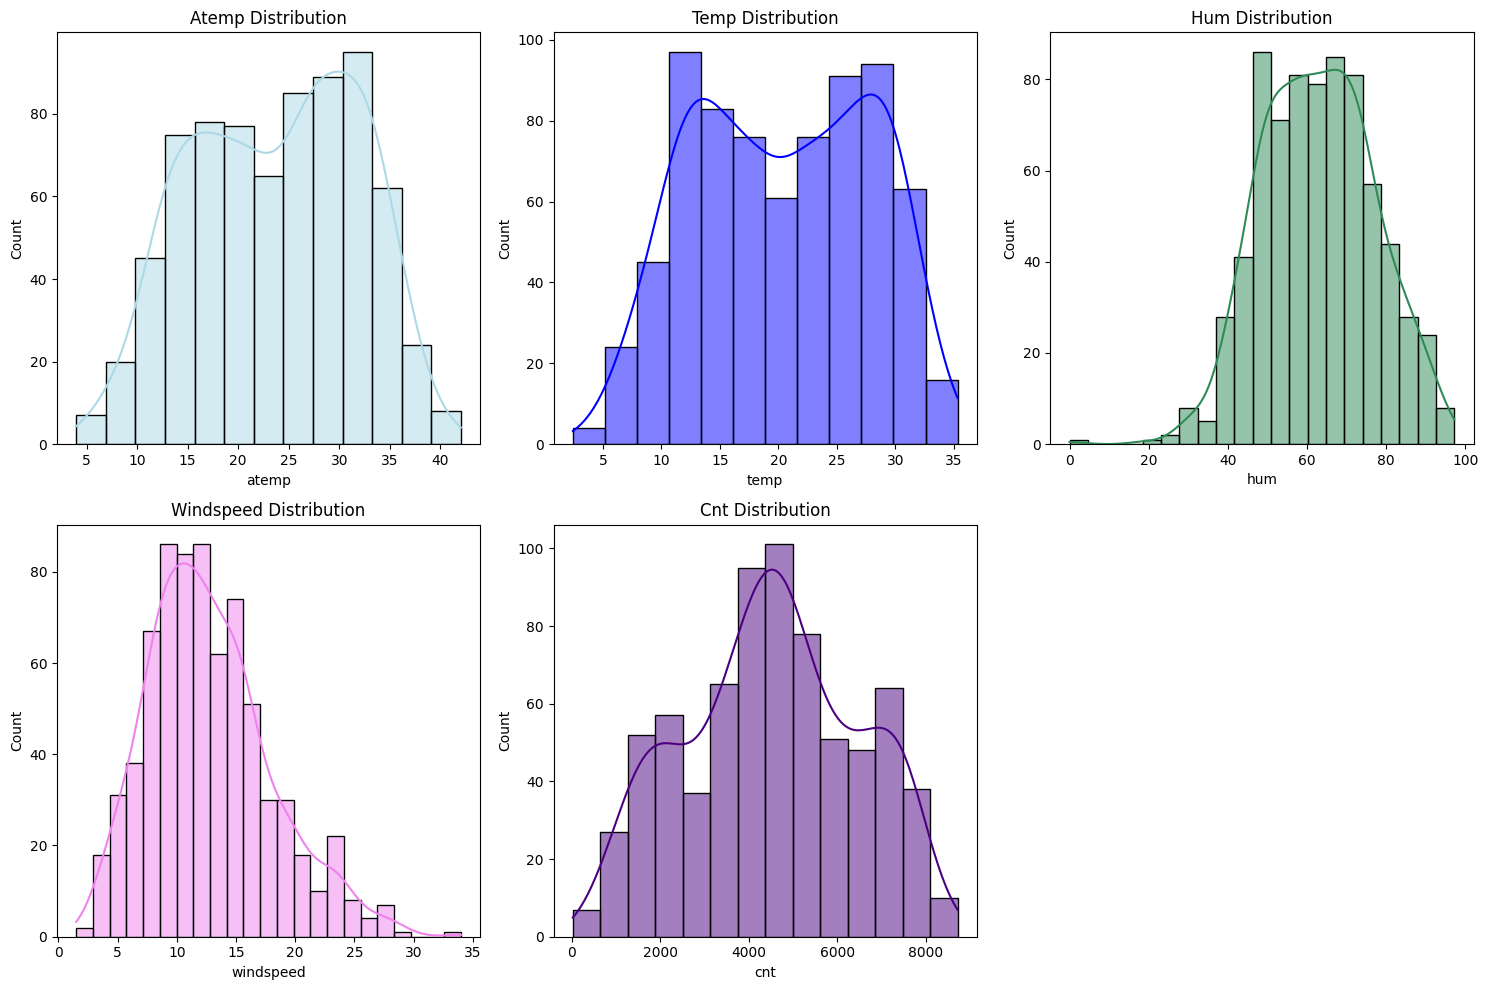


ATEMP Analysis:
Mean: 23.73
Median: 24.37
Optimal range (highest rentals):
From 26.51 to 30.52
Average rentals in optimal range: 8304.00

TEMP Analysis:
Mean: 20.32
Median: 20.47
Optimal range (highest rentals):
From 21.70 to 25.97
Average rentals in optimal range: 8159.80

HUM Analysis:
Mean: 62.77
Median: 62.62
Optimal range (highest rentals):
From 50.17 to 67.25
Average rentals in optimal range: 8304.80

WINDSPEED Analysis:
Mean: 12.76
Median: 12.13
Optimal range (highest rentals):
From 6.96 to 16.58
Average rentals in optimal range: 8209.00

CNT Analysis:
Mean rentals: 4508.01
Median rentals: 4548.50
Peak rentals: 8714.00
Minimum rentals: 22.00

Correlations with rentals:
atemp: 0.631
temp: 0.627
hum: -0.099
windspeed: -0.235


In [23]:
plt.figure(figsize=(15, 10))

# Define variables and palettes
variables = ['atemp','temp', 'hum', 'windspeed', 'cnt']
color = ['lightblue', 'blue', 'seagreen', 'violet', 'indigo']

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=bike_share_df, x=var, kde=True,  color=color[i])
    plt.title(f'{var.capitalize()} Distribution')

plt.tight_layout()
plt.show()

# Calculate statistics and optimal ranges for each variable
for var in variables:
   # Basic statistics
   mean = bike_share_df[var].mean()
   median = bike_share_df[var].median()

   # Find optimal range -rentals are in top 25%
   if var != 'cnt':
       # Group by variable rounded to 2 decimals and get mean rentals
       var_analysis = bike_share_df.groupby(bike_share_df[var].round(2))['cnt'].mean()
       optimal_range = var_analysis.sort_values(ascending=False).head()

       print(f"\n{var.upper()} Analysis:")
       print(f"Mean: {mean:.2f}")
       print(f"Median: {median:.2f}")
       print(f"Optimal range (highest rentals):")
       print(f"From {optimal_range.index.min():.2f} to {optimal_range.index.max():.2f}")
       print(f"Average rentals in optimal range: {optimal_range.mean():.2f}")
   else:
       # For cnt, just show distribution statistics
       print(f"\n{var.upper()} Analysis:")
       print(f"Mean rentals: {mean:.2f}")
       print(f"Median rentals: {median:.2f}")
       print(f"Peak rentals: {bike_share_df[var].max():.2f}")
       print(f"Minimum rentals: {bike_share_df[var].min():.2f}")

# Calculate correlations with rentals
correlations = {}
for var in variables[:-1]:  # Excluding 'cnt'
   corr = bike_share_df[var].corr(bike_share_df['cnt'])
   correlations[var] = corr

print("\nCorrelations with rentals:")
for var, corr in correlations.items():
   print(f"{var}: {corr:.3f}")

Inferences:

1. Temperature (temp) and Feels-like Temperature (atemp):
  - Strong positive correlation with cnt
  - Shows normal distribution
  - 21.5 to 26 degress is optimal range and shows highest rental and best conditions for riding
  - Bikes were rented at average tempaerature of 20 degrees

2. Humidity (hum):
  - Mid negative correlation with cnt
  - Indicating lower humidity generally preferred

3. Windspeed:
  - Weak negative correlation with cnt
  - Indicating lower wind speed is preferred



**plot numericals in pair plots**

<Figure size 1200x800 with 0 Axes>

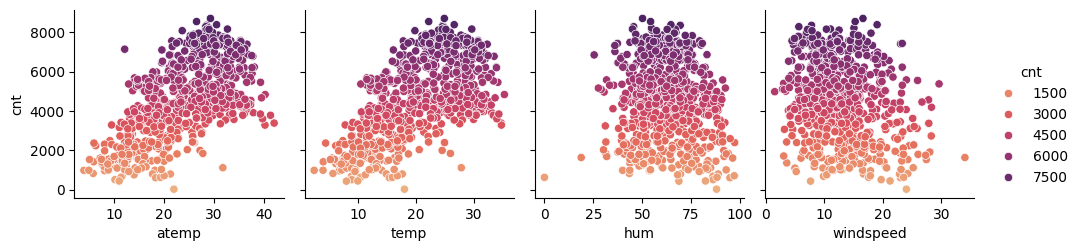

<Figure size 640x480 with 0 Axes>

In [52]:
# Subjective question answer
# Create pairplot
variables = ['atemp','temp', 'hum', 'windspeed']
color = ['lightblue', 'blue', 'seagreen', 'violet', 'indigo']
plt.figure(figsize=(12, 8))
sns.pairplot(data = bike_share_df, x_vars = variables, y_vars = ['cnt'], hue = 'cnt', palette = 'flare')
plt.show()

plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()



**Bivariate analysis- checking how one parameter affects another**

***First all numerical values***

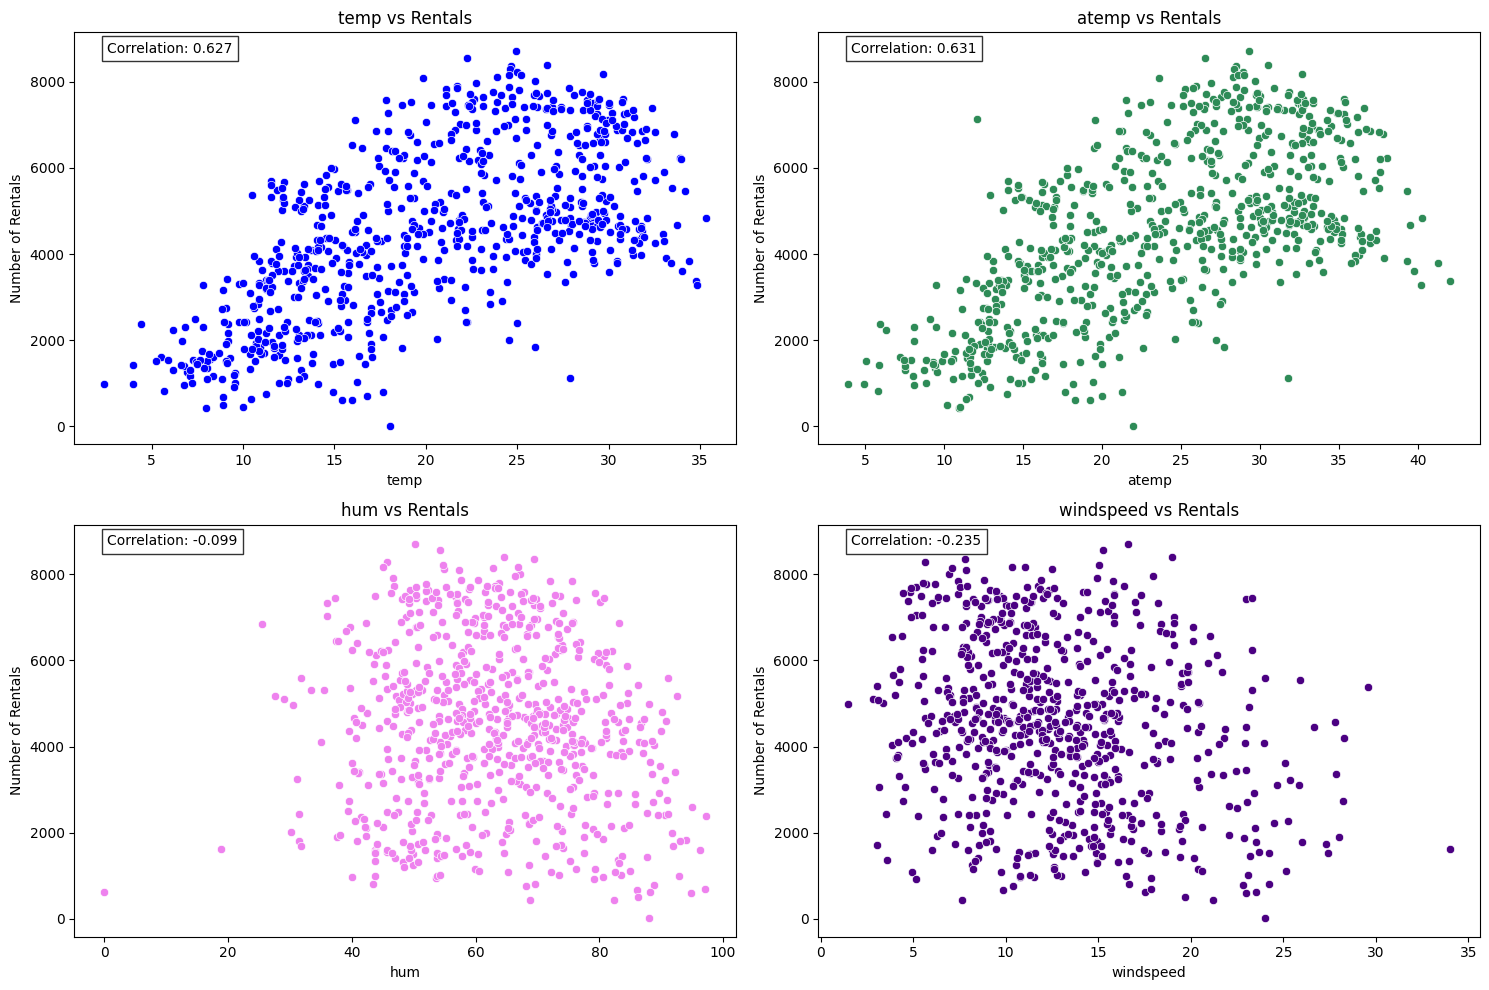


Correlation with Rentals:
temp: 0.627
atemp: 0.631
hum: -0.099
windspeed: -0.235

Optimal ranges of vars/features for bike rental:

TEMP:
Range: 14.83 to 33.96
Mean in optimal range: 25.43

ATEMP:
Range: 12.12 to 38.07
Mean in optimal range: 29.23

HUM:
Range: 25.42 to 83.12
Mean in optimal range: 60.74

WINDSPEED:
Range: 3.88 to 23.29
Mean in optimal range: 11.29


In [24]:
# plot all numberical values against cnt to fine how it affects rentals
plt.figure(figsize=(15, 10))

# numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']

# plot colors like above
colors = ['blue', 'seagreen', 'violet', 'indigo']

# Create scatter plots for each variable
for i, var in enumerate(numerical_vars):
   plt.subplot(2, 2, i+1)
   sns.scatterplot(data=bike_share_df, x=var, y='cnt', color=colors[i])
   plt.title(f'{var} vs Rentals')
   plt.xlabel(var)
   plt.ylabel('Number of Rentals')

   # corelation values
   correlation = bike_share_df[var].corr(bike_share_df['cnt'])
   plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
            transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nCorrelation with Rentals:")
for var in numerical_vars:
   correlation = bike_share_df[var].corr(bike_share_df['cnt'])
   print(f"{var}: {correlation:.3f}")

# optimal ranges of vars/features for bike rental
print("\nOptimal ranges of vars/features for bike rental:")
for var in numerical_vars:
   # get first 25%; sort descending and modulus 4
   top_rentals = bike_share_df.sort_values('cnt', ascending=False).head(len(bike_share_df)//4)
   optimal_range = {
       'min': top_rentals[var].min(),
       'max': top_rentals[var].max(),
       'mean': top_rentals[var].mean()
   }
   print(f"\n{var.upper()}:")
   print(f"Range: {optimal_range['min']:.2f} to {optimal_range['max']:.2f}")
   print(f"Mean in optimal range: {optimal_range['mean']:.2f}")

Inferences
  - Temparature seems strong influencer for rental
  - Ideal temparature is a favourable outcome for rental
  - temp and atemp and are showing very similiar correlation possible multicolinearity

***Lets visualise the correlation in heat map***

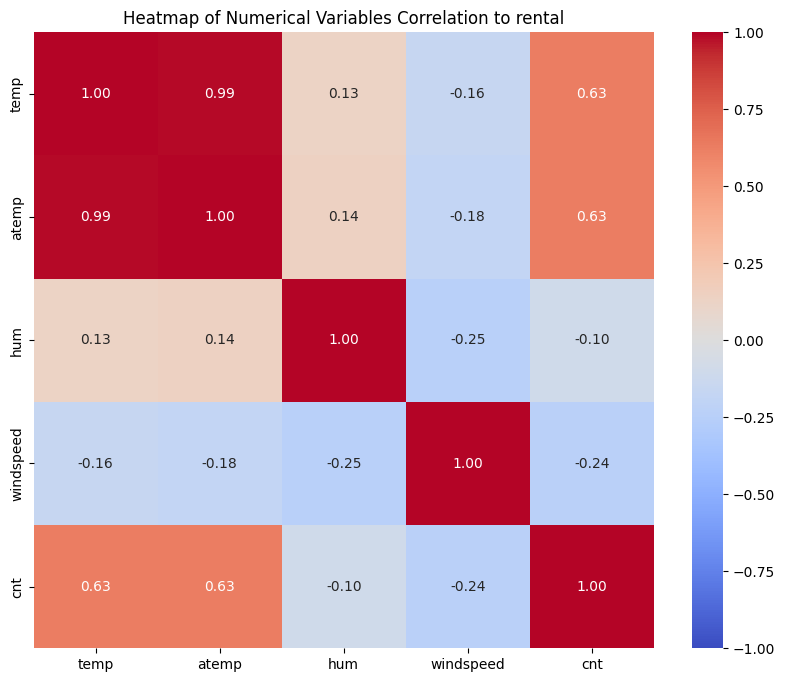

In [25]:
# set correlation matrix

numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = bike_share_df[numerical_vars].corr()

# heatmap with correlation values annotated and color scheme as flare and foramtted to 2 decimal places

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
           annot=True,
           cmap='coolwarm',
           vmin=-1, vmax=1,
           center=0,
           fmt='.2f')
plt.title('Heatmap of Numerical Variables Correlation to rental')
plt.show()


Inferences:
  - atemp and temp shows almost similiar correlation to cnt; string correlation; multicolinearity
  - either temp or atemp should be dropped, we will check this agin with multicolinearity check
  - windspeed and hum are negatively correlated with cnt meaning on high humidity and high windspeed days bike rentals comes down

***Plot categorical variables for analysis***



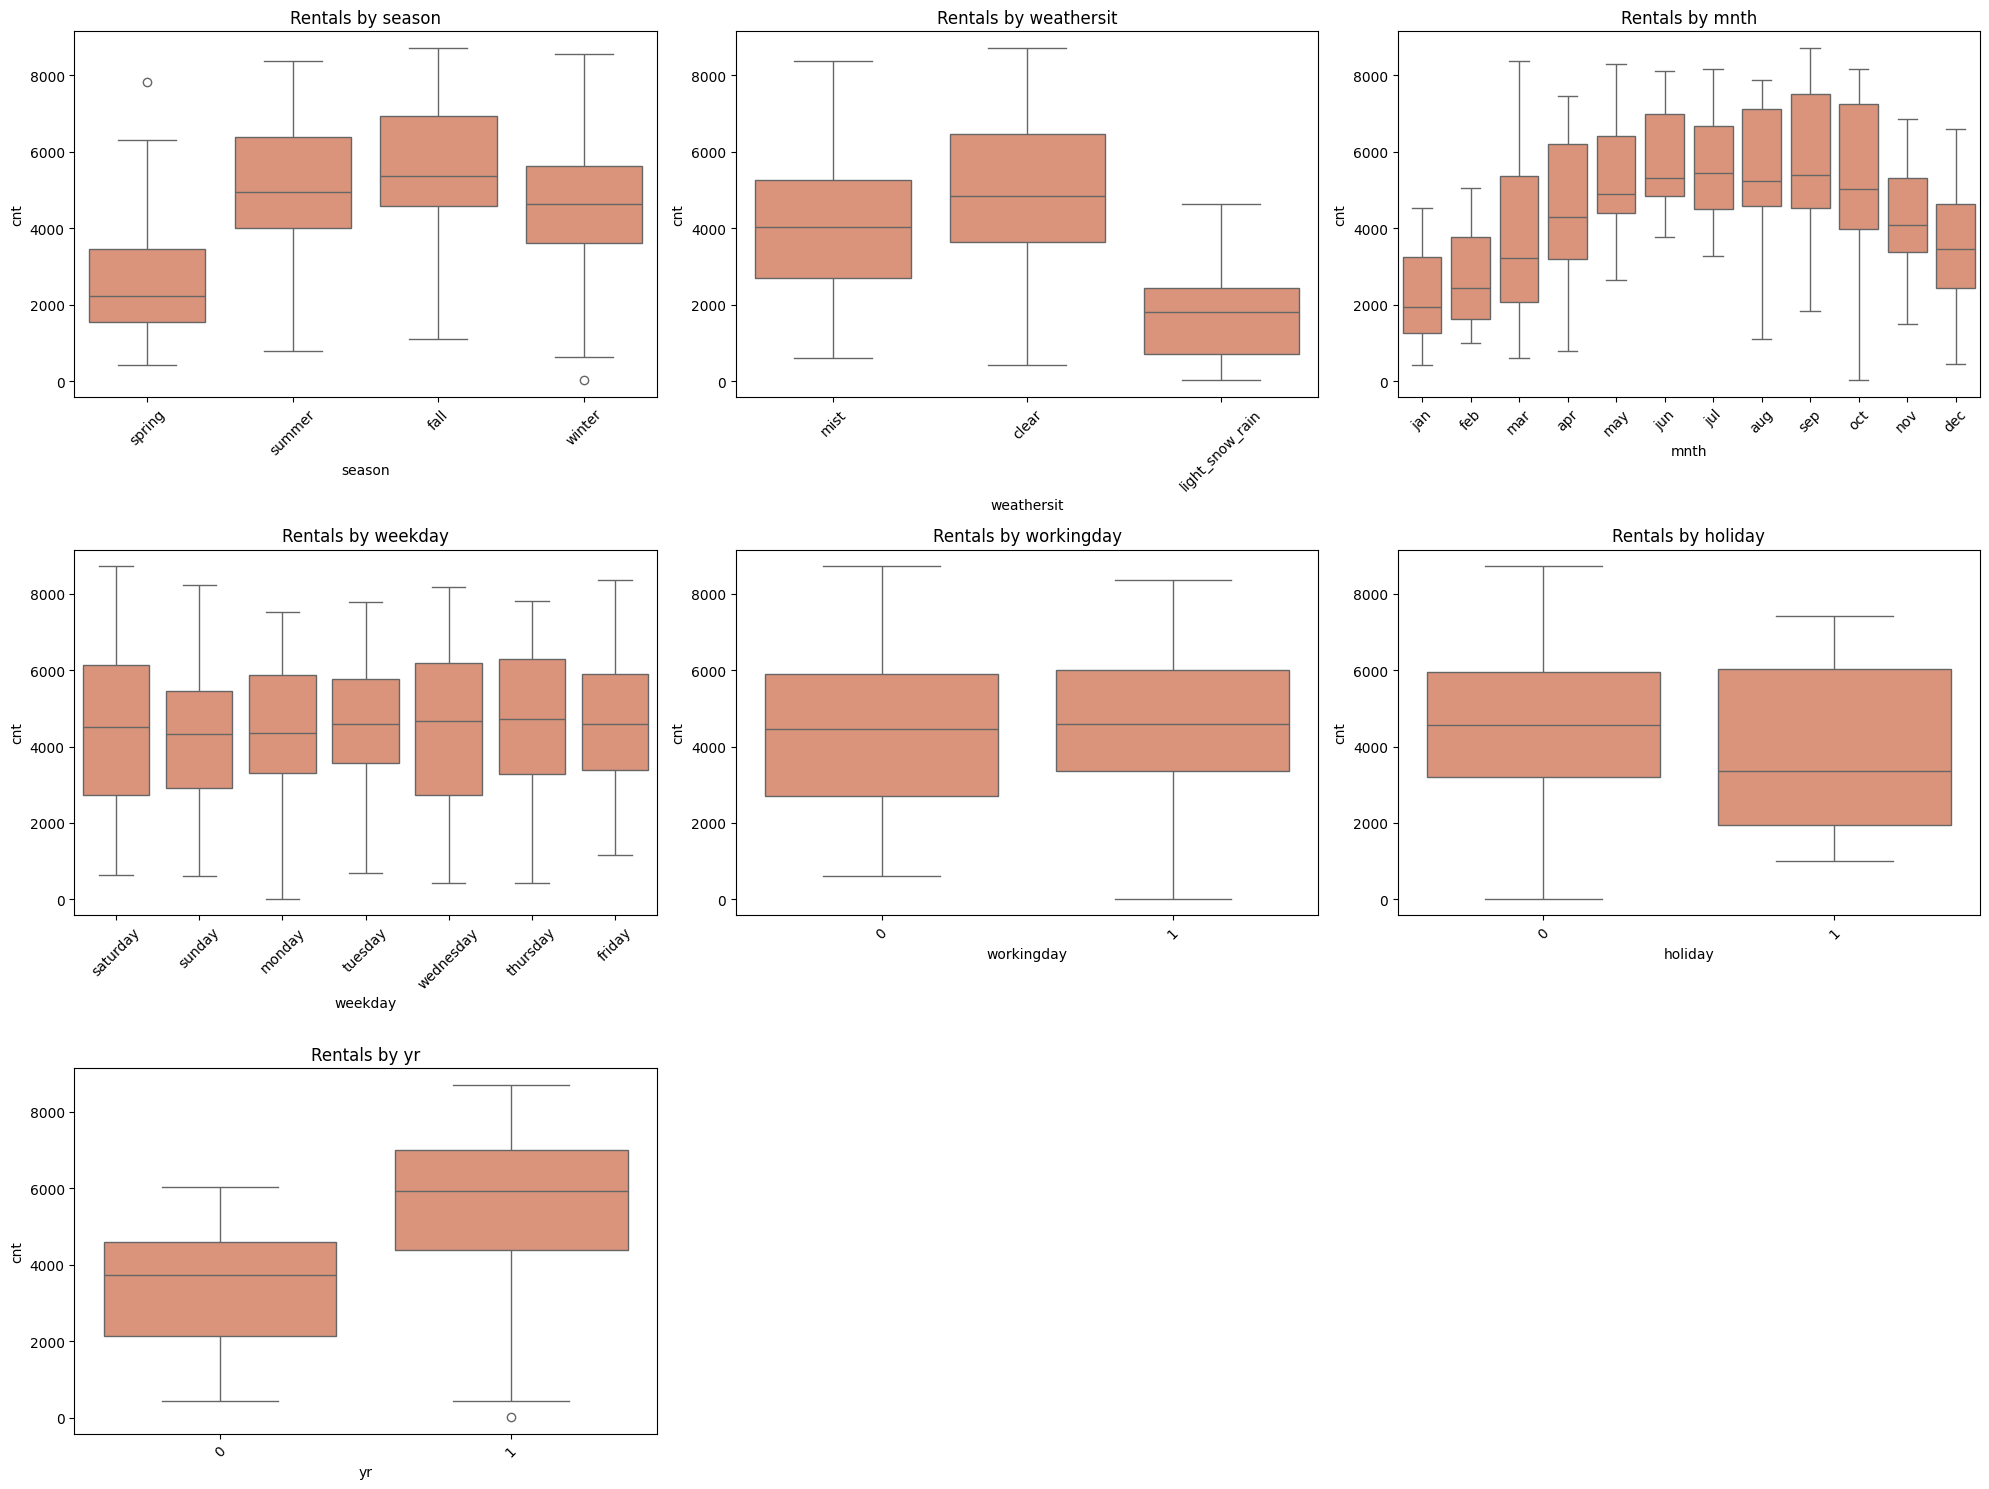

\ Statistics:

SEASON Analysis:
           mean  median      std  count
season                                 
fall    5644.30  5353.5  1459.80    188
spring  2608.41  2222.5  1402.66    180
summer  4992.33  4941.5  1695.98    184
winter  4728.16  4634.5  1699.62    178
ANOVA p-value: 0.0000000000

WEATHERSIT Analysis:
                    mean  median      std  count
weathersit                                      
clear            4876.79  4844.0  1879.48    463
light_snow_rain  1803.29  1817.0  1240.28     21
mist             4044.81  4043.0  1807.31    246
ANOVA p-value: 0.0000000000

MNTH Analysis:
         mean  median      std  count
mnth                                 
apr   4484.90  4293.5  1776.16     60
aug   5664.42  5229.5  1494.52     62
dec   3403.81  3444.0  1549.64     62
feb   2669.96  2438.5  1150.26     56
jan   2176.34  1939.0  1161.67     62
jul   5563.68  5446.5  1273.75     62
jun   5772.37  5308.5  1240.40     60
mar   3692.26  3216.5  1899.30     62
may   534

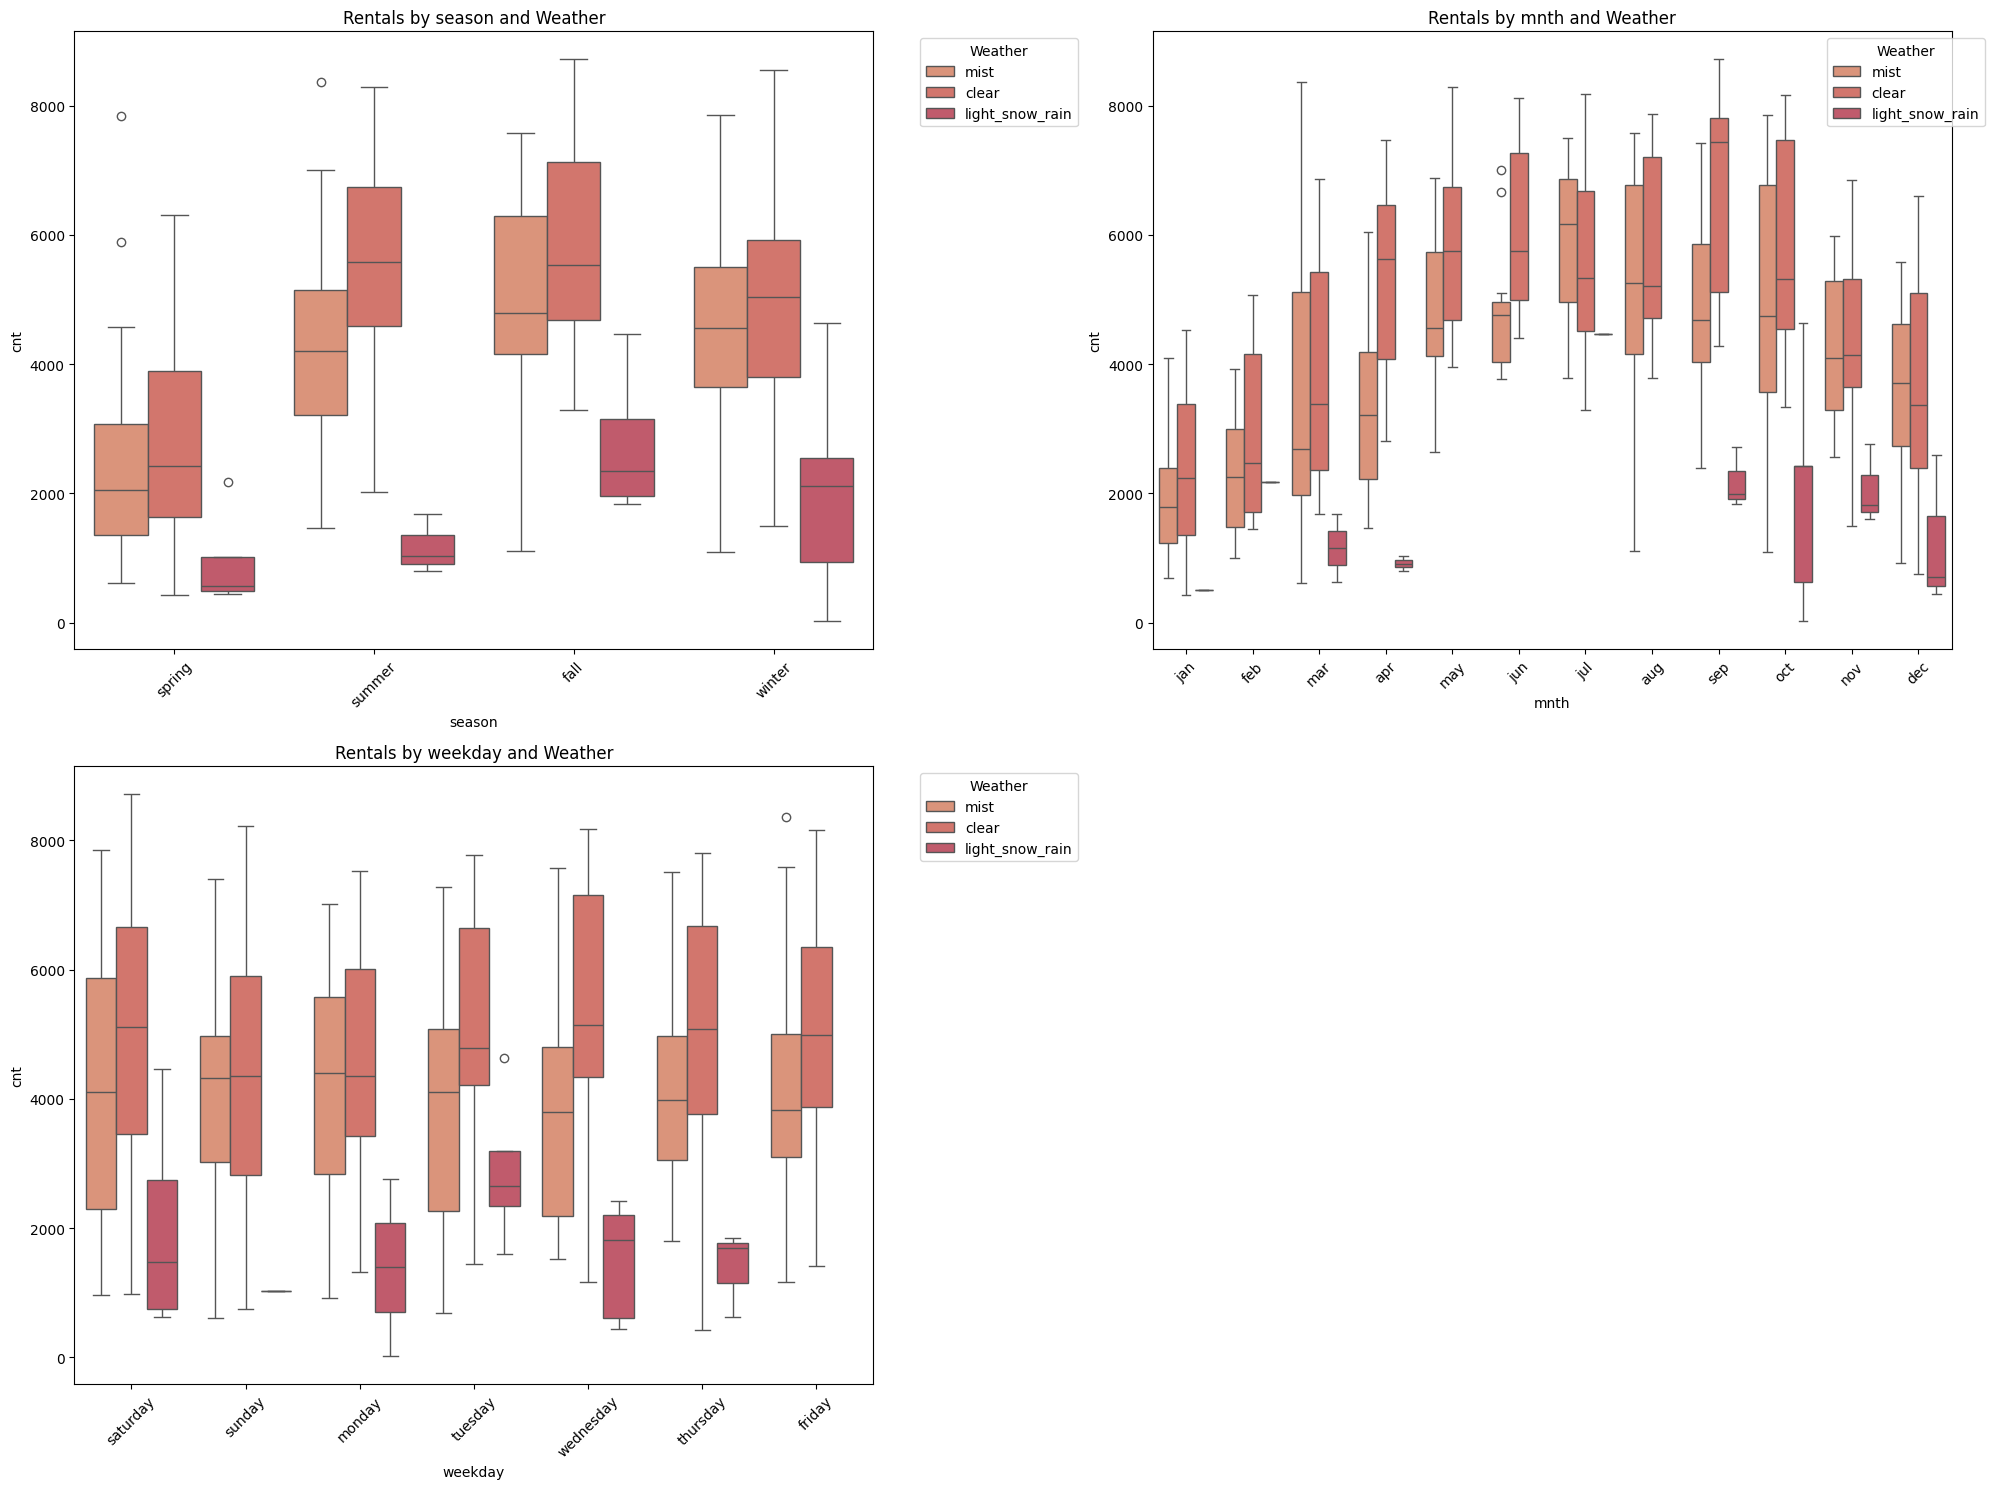

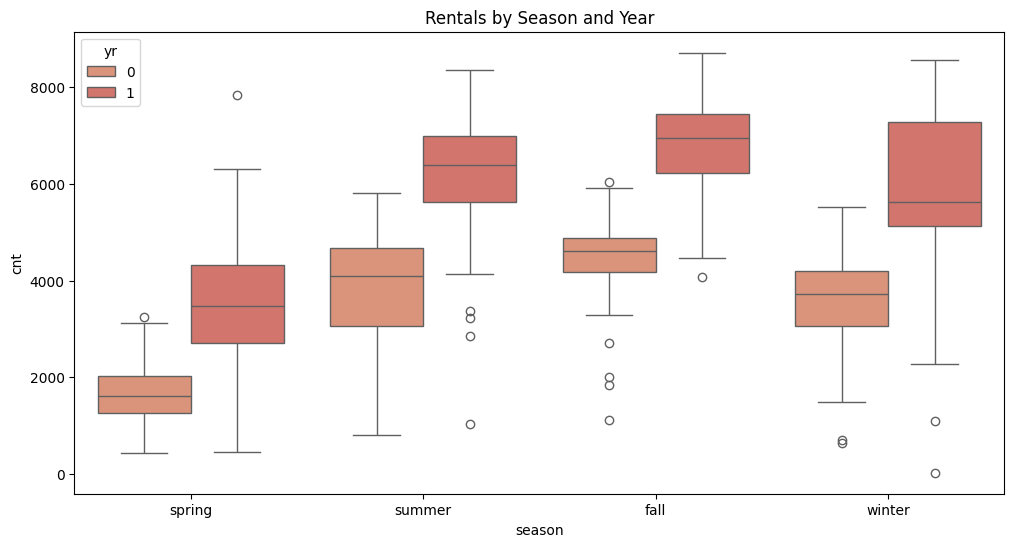

In [26]:
# set plot
plt.figure(figsize=(20, 15))

# categorical variables
categorical_vars = ['season', 'weathersit', 'mnth', 'weekday', 'workingday', 'holiday', 'yr']

# now we create box plot as it is best for showing categorical relationships

for i, var in enumerate(categorical_vars, 1):
   plt.subplot(3, 3, i)
   sns.boxplot(x=var, y='cnt', data=bike_share_df)
   plt.title(f'Rentals by {var}')
   plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Stats for each var/feature rounded to 2 decimal
print("\ Statistics:")
for var in categorical_vars:
   print(f"\n{var.upper()} Analysis:")
   stats = bike_share_df.groupby(var)['cnt'].agg(['mean', 'median', 'std', 'count'])
   print(stats.round(2))

   # Calculate ANOVA to test if differences are significant
   from scipy import stats as stats
   f_stat, p_value = stats.f_oneway(*[group['cnt'].values for name, group in bike_share_df.groupby(var)])
   print(f"ANOVA p-value: {p_value:.10f}")

# lets look at it weather to see better
plt.figure(figsize=(20, 15))

# how does it work with weather
for i, var in enumerate(['season', 'mnth', 'weekday'], 1):
   plt.subplot(2, 2, i)
   sns.boxplot(x=var, y='cnt', hue='weathersit', data=bike_share_df)
   plt.title(f'Rentals by {var} and Weather')
   plt.xticks(rotation=45)
   plt.legend(title='Weather', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# Year-wise comparison across seasons
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', hue='yr', data=bike_share_df)
plt.title('Rentals by Season and Year')
plt.show()



Inferences: Interesting inferences when done with weather

  - Higherst rentals are seen in summer/fall
  - Lowest rentals in winter
  - Weather impacts negatively more often in winter and spring
  - peak rentals in summer months; advertise heavily for summer
  - Overall the space is booming with year on year rentals growing; the business is viable and good
  - Weekend weather affects are more prominenet


***lets compare prominent numerical and categorical values***



<Figure size 1200x800 with 0 Axes>

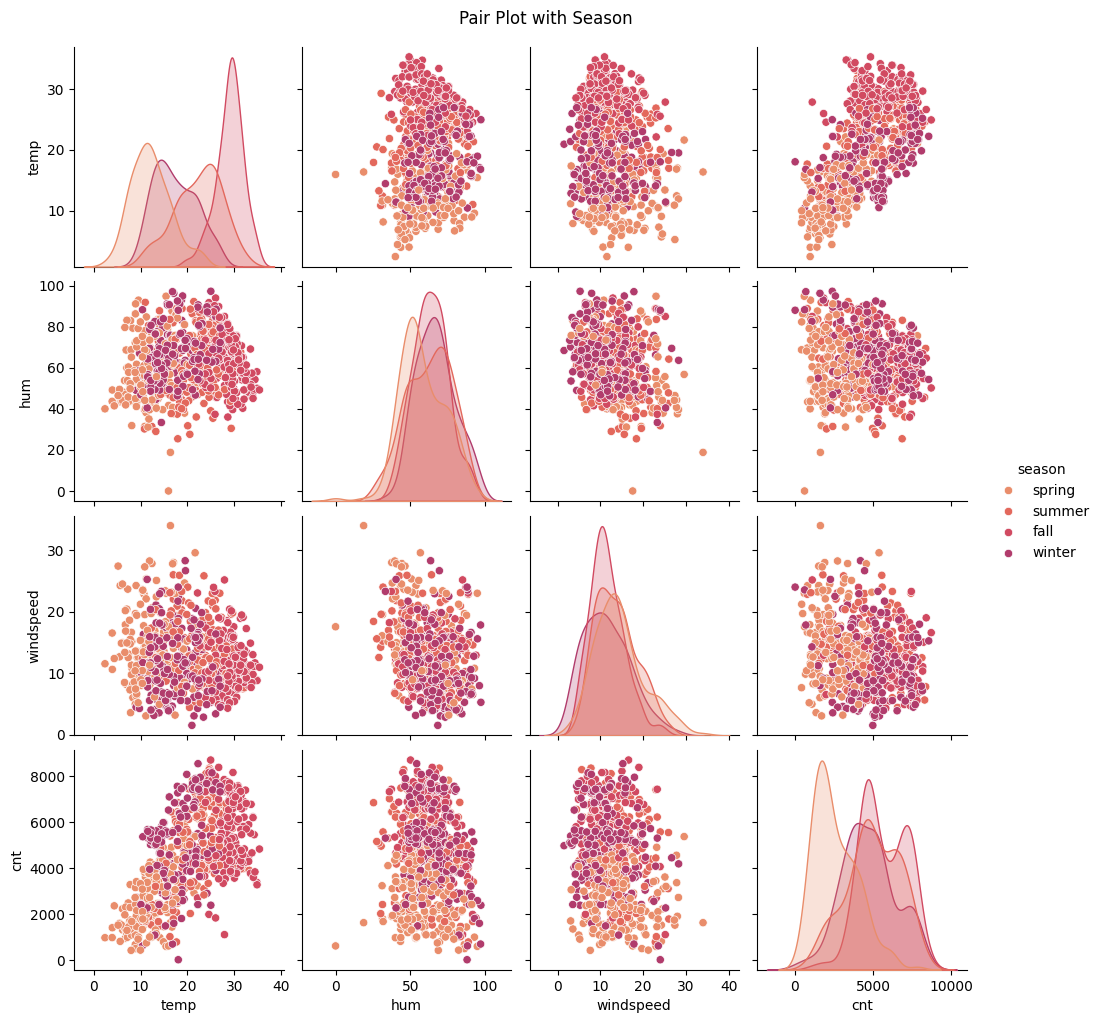

<Figure size 1200x800 with 0 Axes>

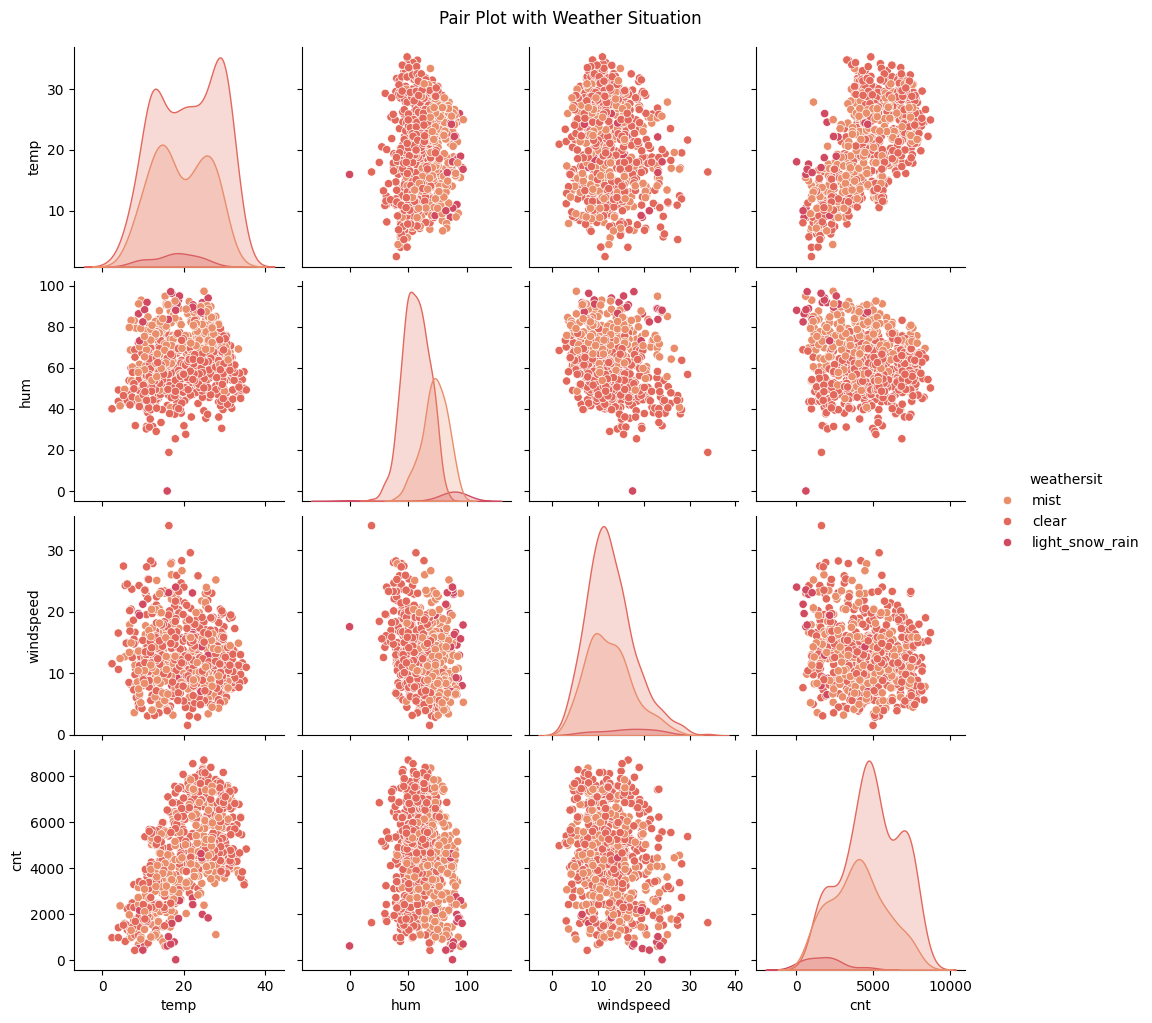

<Figure size 1200x800 with 0 Axes>

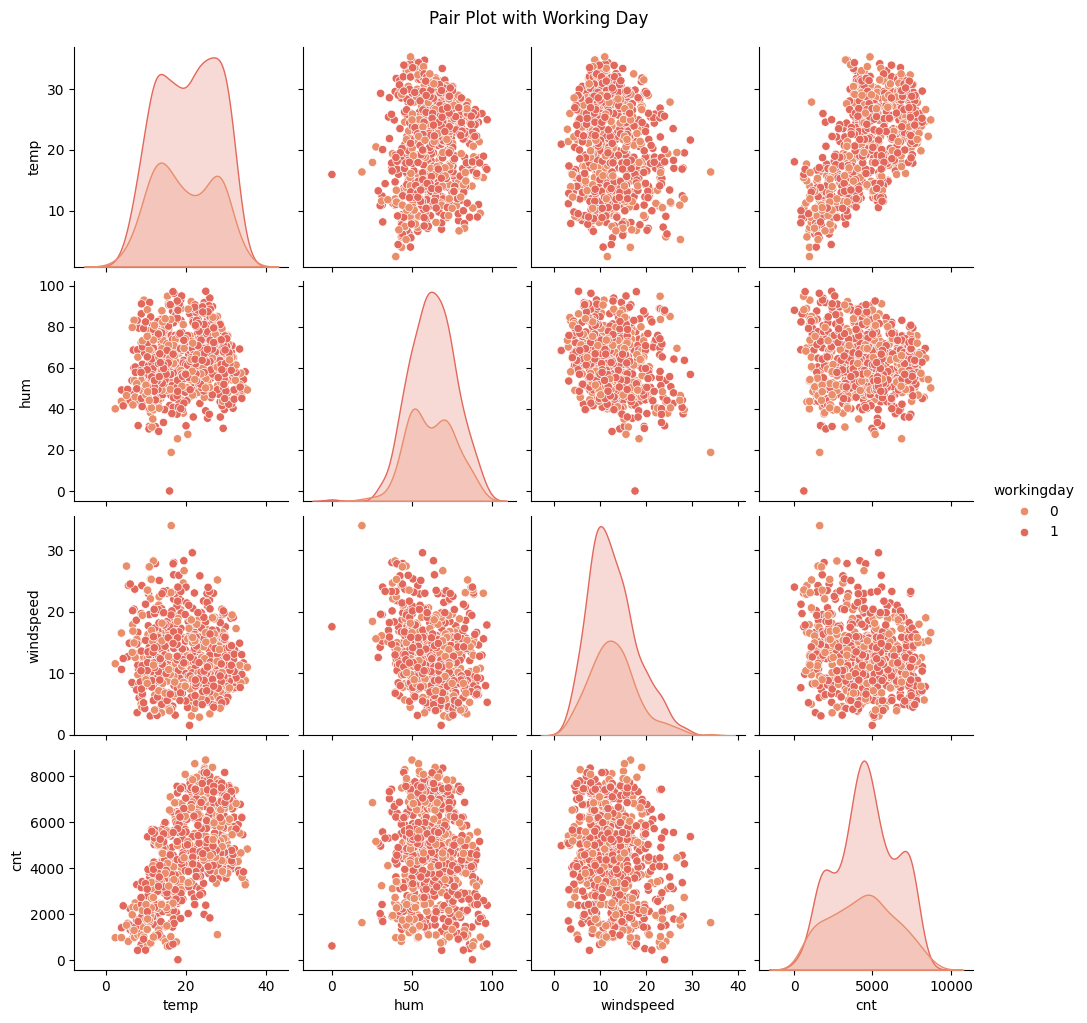

In [27]:
# define both vars
numerical_vars = ['temp', 'hum', 'windspeed', 'cnt']
categorical_vars = ['season', 'weathersit', 'workingday']

# pair plots with season
plt.figure(figsize=(12, 8))
sns.pairplot(bike_share_df[numerical_vars + ['season']],
            hue='season',
            diag_kind='kde')
plt.suptitle('Pair Plot with Season', y=1.02)
plt.show()

#pair plot with weathersit
plt.figure(figsize=(12, 8))
sns.pairplot(bike_share_df[numerical_vars + ['weathersit']],
            hue='weathersit',
            diag_kind='kde')
plt.suptitle('Pair Plot with Weather Situation', y=1.02)
plt.show()

#pair plot with working day
plt.figure(figsize=(12, 8))
sns.pairplot(bike_share_df[numerical_vars + ['workingday']],
            hue='workingday',
            diag_kind='kde')
plt.suptitle('Pair Plot with Working Day', y=1.02)
plt.show()


Inferences:

  - Clear weather leads to higher rentals
  - Summer and fall seasons are favorites for riding and also has favorable weather parameters
  - Higher windspeed and higher humidity are deterrent to riding and renting; and are more pronounced in winter and spring

  Business decisions:
  - Use a seasonal startegy to attract more rentals; season specific pricing may be
  - maintenence plan on bad weather days


***check multicolinearity***

****Multicollinearity test between temp and atemp- VIF****

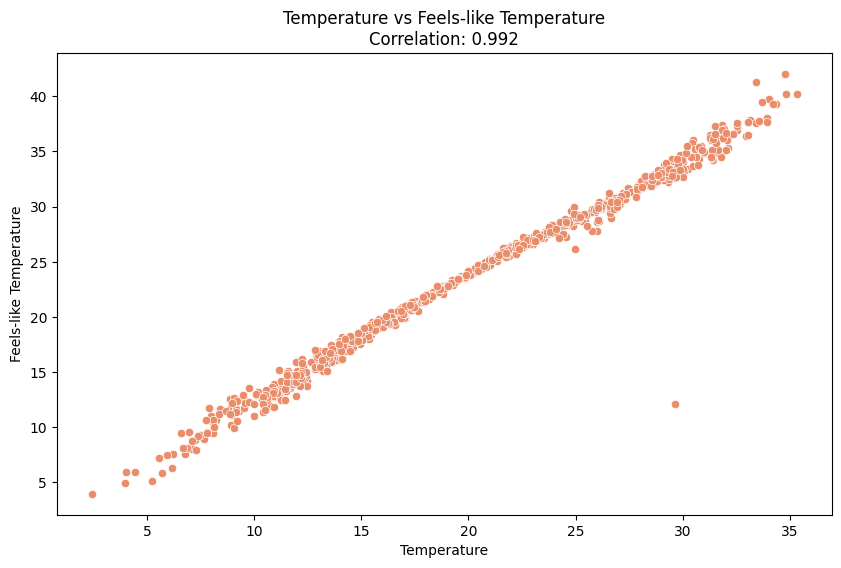


VIF Values:
  Variable        VIF
0    const  11.450358
1     temp  60.464284
2    atemp  60.464284


In [28]:
# correaltion between temp and atemp
correlation = bike_share_df['temp'].corr(bike_share_df['atemp'])

# scatter for correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_share_df, x='temp', y='atemp')
plt.title(f'Temperature vs Feels-like Temperature\nCorrelation: {correlation:.3f}')
plt.xlabel('Temperature')
plt.ylabel('Feels-like Temperature')
plt.show()

#VIF Calculation import
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = bike_share_df[['temp', 'atemp']]
X = add_constant(X)  # Add constant for VIF calculation

#calc VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF Values:")
print(vif_data)

Inferences

  - VIF > 5 or 10 typically indicates  multicollinearity
  - High VIF values confirm strong multicollinearity

##Data Pre-Prep for modelling

*Prepration Steps*
  
  - Drop multicolinear features
  - Create dummy varibales for categorical values
  - Scale numerical features
  - Separate features and target

***Drop multicolinear feature 'atemp'***

In [29]:
# create modelling dataframe - a copy to work on for modelling

model_df = bike_share_df.copy()

In [30]:
# drop atemp
model_df = model_df.drop('atemp', axis=1)
model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


***Scale numerical features***

  - All features should be on same scale

In [31]:
# scale using minmax scaler
numerical_cols = ['temp', 'hum', 'windspeed']
scaler = MinMaxScaler()
model_df[numerical_cols] = scaler.fit_transform(model_df[numerical_cols])
model_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,mist,0.355170,0.828620,0.284606,985
1,spring,0,jan,0,sunday,0,mist,0.379232,0.715771,0.466215,801
2,spring,0,jan,0,monday,1,clear,0.171000,0.449638,0.465740,1349
3,spring,0,jan,0,tuesday,1,clear,0.175530,0.607131,0.284297,1562
4,spring,0,jan,0,wednesday,1,clear,0.209120,0.449313,0.339143,1600


***create dummy variables for categorical features (n-1)***

In [32]:
# create dummy variables
categorical_cols = ['season', 'weathersit', 'mnth', 'weekday']
model_df = pd.get_dummies(model_df, columns=categorical_cols, drop_first=True) # dropFirst=True to avoid multicolinearity
model_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,0,0.355170,0.828620,0.284606,985,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,0.379232,0.715771,0.466215,801,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,1,0.171000,0.449638,0.465740,1349,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,0.175530,0.607131,0.284297,1562,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,0.209120,0.449313,0.339143,1600,True,False,False,...,False,False,False,False,False,False,False,False,False,True


***seaprate features and target for modelling***

In [33]:
# x-axis will only have features and y-axis will have target
X = model_df.drop('cnt', axis=1)
y = model_df['cnt']

***Split into train and test 80:20***

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***verify all the prepration steps***

In [35]:
#check against original shape
print("Before prep shape:", bike_share_df.shape)
print("Model shape:", model_df.shape)
print("\nScaled numerical features statistics:")
print(model_df[numerical_cols].describe())

#  Features and target shape
print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Before prep shape: (730, 12)
Model shape: (730, 29)

Scaled numerical features statistics:
             temp         hum   windspeed
count  730.000000  730.000000  730.000000
mean     0.543852    0.645400    0.346568
std      0.228140    0.146402    0.159873
min      0.000000    0.000000    0.000000
25%      0.346084    0.534704    0.232045
50%      0.548307    0.643959    0.326928
75%      0.743261    0.750535    0.434629
max      1.000000    1.000000    1.000000

Features shape: (730, 28)
Target shape: (730,)

Training set shape: (584, 28)
Testing set shape: (146, 28)


##Data Modelling

**Model using RFE**

In [36]:
#import modelling libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Model using 15 features**

Total number of features: 28

Selected features: 15
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_light_snow_rain',
       'weathersit_mist', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_saturday', 'weekday_sunday'],
      dtype='object')

Feature Ranking (1 indicates selected features):
                       Feature  Ranking
0                           yr        1
19                    mnth_nov        1
15                    mnth_jul        1
23            weekday_saturday        1
10             weathersit_mist        1
9   weathersit_light_snow_rain        1
8                season_winter        1
12                    mnth_dec        1
6                season_spring        1
1                      holiday        1
2                   workingday        1
3                         temp        1
24              weekday_sunday        1
4                          hum        1
5                    windspeed 

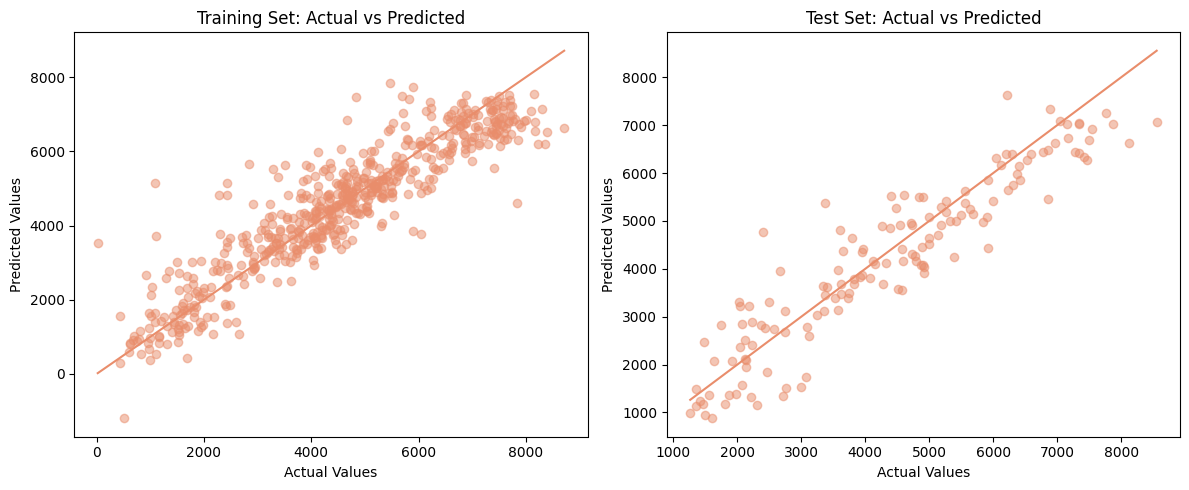

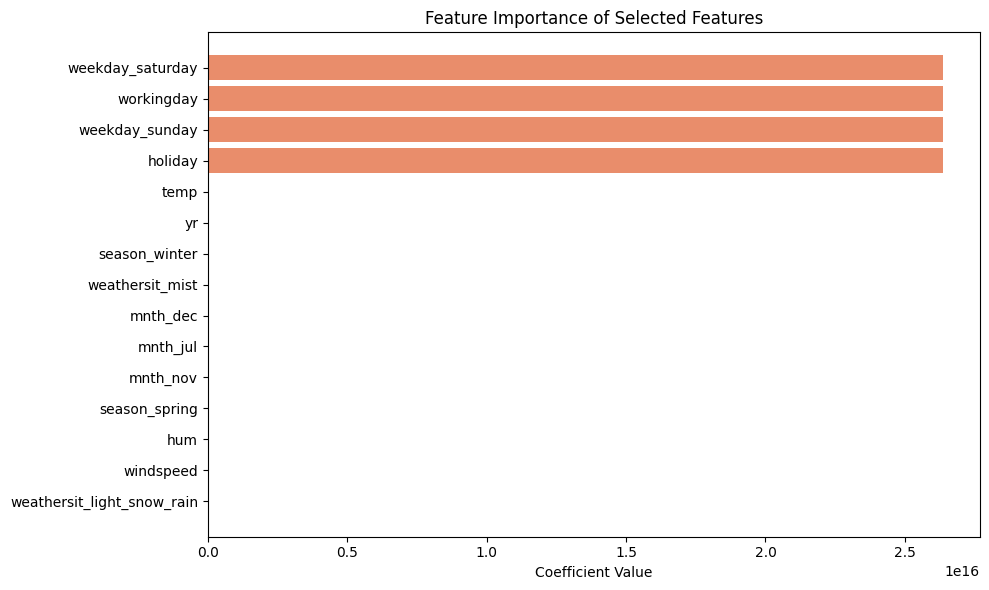

Data types after conversion:
yr                            float64
holiday                       float64
workingday                    float64
temp                          float64
hum                           float64
windspeed                     float64
season_spring                 float64
season_winter                 float64
weathersit_light_snow_rain    float64
weathersit_mist               float64
mnth_dec                      float64
mnth_jul                      float64
mnth_nov                      float64
weekday_saturday              float64
weekday_sunday                float64
dtype: object

VIF Values for Selected Features:
                       Feature        VIF
2                   workingday  47.780879
14              weekday_sunday  11.586842
13            weekday_saturday  10.798277
3                         temp   3.444818
1                      holiday   3.321783
6                season_spring   2.806560
7                season_winter   2.215907
4               

In [37]:

#base model
base_model = LinearRegression()

# Create RFE model with 15 features
n_features_to_select = 15
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features_mask = rfe.support_
selected_features = X.columns[selected_features_mask]

# Get the feature ranking
feature_ranking = pd.DataFrame({
   'Feature': X.columns,
   'Ranking': rfe.ranking_
})
feature_ranking = feature_ranking.sort_values('Ranking')

print("Total number of features:", len(X.columns))
print("\nSelected features:", len(selected_features))
print(selected_features)
print("\nFeature Ranking (1 indicates selected features):")
print(feature_ranking)

# Create new dataframes with selected features only
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Generate model summary using statsmodels
X_train_rfe_const = sm.add_constant(X_train_rfe.astype(float))
model_summary = sm.OLS(y_train, X_train_rfe_const).fit()
print("\nModel Summary:")
print(model_summary.summary())

# Fit the linear regression model with selected features
model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)

# Get coefficients for selected features
coefficients = pd.DataFrame({
   'Feature': selected_features,
   'Coefficient': model_rfe.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

print("\nModel Coefficients for Selected Features:")
print(coefficients)

# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions
y_train_pred = model_rfe.predict(X_train_rfe)
y_test_pred = model_rfe.predict(X_test_rfe)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred) # as per the problem statement R2 Value for test set is calculated
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training R2: {train_r2:.4f}")
print(f"Testing R2: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
coefficients_plot = coefficients.sort_values('Coefficient')
plt.barh(coefficients_plot['Feature'], coefficients_plot['Coefficient'])
plt.title('Feature Importance of Selected Features')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


# Create dataframe with selected features only
X_selected = X_train_rfe.copy()

# Convert to float64float explicitly
X_selected = X_selected.astype(float)  # wihout conversion this was throwing a datatype error hence explicitly converd to float

print("Data types after conversion:")
print(X_selected.dtypes)

# Now calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns

# Calculate VIF with explicit type conversion
vif_data['VIF'] = [variance_inflation_factor(X_selected.astype(float).values, i)
                   for i in range(X_selected.shape[1])]  # wihout conversion this was throwing a datatype error hence explicitly converd to float

# Sort VIF values
vif_data = vif_data.sort_values('VIF', ascending=False)
print("\nVIF Values for Selected Features:")
print(vif_data)

#  model statistics
print("\ Model Statistics:")

print(f"AIC: {model_summary.aic:.2f}")
print(f"BIC: {model_summary.bic:.2f}")
print(f"Condition Number: {model_summary.condition_number:.2f}")
print(f"F-statistic: {model_summary.fvalue:.2f}")
print(f"Prob (F-statistic): {model_summary.f_pvalue:.2e}")

Inferences:

  - Very good R-squared (0.834) and Adjusted R-squared (0.829), indicating the model explains about 83% of the variance
  - Strong F-statistic (203.6) model is statisticall significant
  - Good consistency between training (R² = 0.8335) and testing (R² = 0.8570) performance, indicating no overfitting

  Feature Analysis:

  - 'yr' (t=29.140): Strong positive effect, indicating increasing trend in rentals over years
  - 'temp' (t=13.626): Strong positive relationship with rentals as determined earlier by bivarite and univariate anlaysis
  - 'weekday_saturday' (t=9.642): Significantly higher rentals on Saturdays
  - Humidity and Windspeed have negative impact
  - High condition  number indicates multicolinearity

**Lets do stats modelling by Manual elimination of features with high P-Vaues >0.05**


In [38]:
# creating as fcntions because we are elminiating and comparing and needs multiple runs
# functional for model summary

def generate_model_with_summary(X_train, y_train):
   X_train_const = sm.add_constant(X_train)
   model = sm.OLS(y_train, X_train_const).fit()
   print(model.summary())
   return model

# function for VIF
def calculate_VIF(X_train):
   # Convert to DataFrame if it's a numpy array
   if isinstance(X_train, np.ndarray):
       X_train = pd.DataFrame(X_train, columns=X_train_rfe.columns)

   vif_df = pd.DataFrame()
   vif_df["Variable"] = X_train.columns
   vif_df["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
   print("\nVIF Values:")
   print(vif_df.sort_values('VIF', ascending=False))
   return vif_df

In [39]:
# Create Model 1 using initially selected features
X_train_rfe_1 = X_train_rfe.copy()
print("Model 1 - Initial Model with Selected Features:")
model_1 = generate_model_with_summary(X_train_rfe_1.astype(float).values, y_train)
vif_1 = calculate_VIF(X_train_rfe_1.astype(float).values)

Model 1 - Initial Model with Selected Features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     203.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          7.34e-211
Time:                        04:45:04   Log-Likelihood:                -4730.2
No. Observations:                 584   AIC:                             9490.
Df Residuals:                     569   BIC:                             9556.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

**Modelling by manual elimination**

Features to eliminate based on VIF > 5:

  - workingday (VIF: 47.78)
  - weekday_sunday (VIF: 11.5)
  - weekday_saturday (VIF: 10.79)

Features to eliminate based on p-value > 0.05:
  - workingday (p-value: 0.201)

In [40]:
# Create Model 2 with filtered columns
features_to_keep = ['yr', 'temp', 'hum', 'windspeed', 'season_spring',
                   'season_winter', 'weathersit_light_snow_rain',
                   'mnth_dec', 'mnth_jul', 'mnth_nov', 'holiday','weathersit_mist']

# Verify the column names
print("Available columns in X_train_rfe:")
print(X_train_rfe.columns)

# Create Model 2
X_train_rfe_2 = X_train_rfe[features_to_keep]
X_train_rfe_2 = X_train_rfe_2.astype({col: 'int' for col in X_train_rfe_2.select_dtypes('bool').columns}) # for unifromity with boolean

# Generate model summary and VIF
print("\nModel 2 - After Removing High VIF and High P-value Features:")
model_2 = generate_model_with_summary(X_train_rfe_2, y_train)

vif_2 = calculate_VIF(X_train_rfe_2)

Available columns in X_train_rfe:
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_light_snow_rain',
       'weathersit_mist', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'weekday_saturday', 'weekday_sunday'],
      dtype='object')

Model 2 - After Removing High VIF and High P-value Features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.33e-209
Time:                        04:45:11   Log-Likelihood:                -4738.8
No. Observations:                 584   AIC:                             9504.
Df Residuals:                     571   BIC:                             9560.
Df Mo

Inference:

Temp is still multicolinear but it is highly correlated with the target hence keeping it

Humidity is multicolinear and should be removed

**Model 3 by elmination - Temp is highly correlated to target so keeping it and removing humidity**

In [41]:
# Features to keep for Model 3
features_to_keep = ['yr', 'temp', 'windspeed', 'season_spring',
                   'season_winter', 'weathersit_light_snow_rain',
                   'mnth_dec', 'mnth_jul', 'mnth_nov', 'holiday','weathersit_mist']

# Create Model 3
X_train_rfe_3 = X_train_rfe[features_to_keep]
X_train_rfe_3 = X_train_rfe_3.astype({col: 'int' for col in X_train_rfe_3.select_dtypes('bool').columns}) # for unifromity with boolean
# Generate model summary and VIF
print("\nModel 3 - After Removing Humidity:")
model_3 = generate_model_with_summary(X_train_rfe_3, y_train)
vif_3 = calculate_VIF(X_train_rfe_3)


Model 3 - After Removing Humidity:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.93e-207
Time:                        04:45:33   Log-Likelihood:                -4747.2
No. Observations:                 584   AIC:                             9518.
Df Residuals:                     572   BIC:                             9571.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Inference:

  - Temperature (x2) still has VIF > 5 ( 5.001), indicating some multicollinearity
  
  - Model acccuracy:
    - R² decreased from 0.834 to 0.824 Still a strong model but slight reduction in explanatory power
    - Therefore, while model accuracy decreased slightly, we've achieved better multicollinearity control while maintaining statistical significance across all variables.

The model is deemed satisfactory based on several key indicators:

Statistical Significance:


All features show significant p-values (p < 0.05)
Most VIF values under control (except temperature at 5.22)


Model Performance:

Strong R² value of 0.824
Adjusted R² of 0.820
Only slight decrease in explanatory power from previous models, justified by improved multicollinearity control


Model Fit:

Durbin-Watson statistic of 2.026 indicates no autocorrelation
F-statistic of 242.8 shows strong overall model fit
All coefficients are statistically significant and theoretically sound


temp has a positive coefficient, which aligns with the expectation that higher temperatures may increase bike rentals.
Negative coefficients like weathersit_light_snow_rain and windspeed align with the expectation that unfavorable weather decreases bike rentals.

It balances high explanatory power (R²) with reduced multicollinearity (VIF).


This marks the final model

##Model Evaluation

In [42]:
# Get the selected columns from training data

features_to_keep = ['yr', 'temp', 'windspeed', 'season_spring',
                   'season_winter', 'weathersit_light_snow_rain',
                   'mnth_dec', 'mnth_jul', 'mnth_nov', 'holiday','weathersit_mist']

# Create training and test datasets
X_train_final = X_train[features_to_keep].copy()
X_test_final = X_test[features_to_keep].copy()

# Apply same scaling as training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both train and test
for column in ['temp', 'windspeed']:
    # Fit on train data
    scaler.fit(X_train_final[[column]])
    # Transform train data
    X_train_final[column] = scaler.transform(X_train_final[[column]])
    # Transform test data
    X_test_final[column] = scaler.transform(X_test_final[[column]])

# Add constant for prediction
X_train_final_const = sm.add_constant(X_train_final)
X_test_final_const = sm.add_constant(X_test_final)

# Make predictions
y_train_pred = model_3.predict(X_train_final_const)
y_test_pred = model_3.predict(X_test_final_const)

# Calculate errors and R2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate errors and R2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

print("Model Performance:")
print(f"Training R² = {r2_train:.4f}")
print(f"Testing R² = {r2_test:.4f}")
print(f"Difference = {abs(r2_train - r2_test):.4f}")

# For adjusted R²
n = len(y_train)  # number of observations
p = len(X_train_final.columns)  # number of predictors
adj_r2 = 1 - (1-r2_train)*(n-1)/(n-p-1)
print(f"Adjusted R² = {adj_r2:.4f}")


Model Performance:
Training R² = 0.8211
Testing R² = 0.8296
Difference = 0.0085
Adjusted R² = 0.8176


Inferences

1. Model Performance and Validation:

    - Strong performance with R² values:
    
        - Training R² = 0.8211

        - Testing R² = 0.8296

        - Small difference (0.0085) indicates no overfitting
    - Adjusted R² = 0.8176 shows good model fit even accounting for number of predictors

2. Feature Selection and Elimination Process:

    - Started with RFE selecting 15 features
    - Systematically eliminated features based on:

        - VIF > 5 (multicollinearity)
        - p-value > 0.05 (statistical significance)


3. Kept temperature despite high VIF due to strong theoretical importance


4. Final Model Characteristics:

    - Durbin-Watson = 2.026 (close to 2) indicates no autocorrelation
    - F-statistic = 242.8 with very low p-value shows model significance
    - All remaining features have statistically significant coefficients (p < 0.05)

5. Key Business Drivers (based on coefficients):

    - Positive Drivers:

      - Year (coef: 2020.62) - showing strong growth trend
      - Temperature (coef: 3520.22) - strongest positive impact
      - Winter season (coef: 658.27)

    - Negative Drivers:

      - Bad weather (coef: -2414.30)
      - Spring season (coef: -1254.90)
      - Windspeed (coef: -1247.89)
      - Holiday (coef: -595.20)

7. Model Diagnostics:

    - Residuals show approximately normal distribution
    - Some heteroscedasticity present but acceptable
    - Good prediction accuracy across different rental volumes

***Charts for Residuals and Homoscedascity***

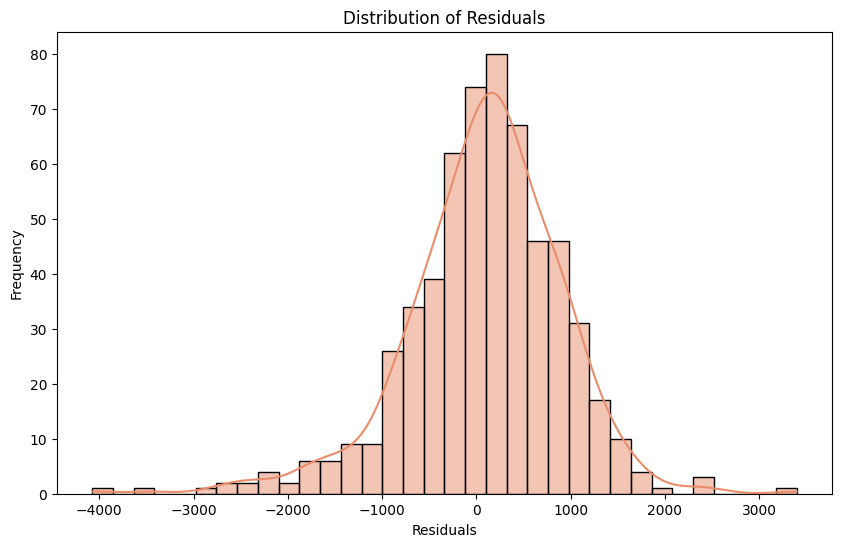

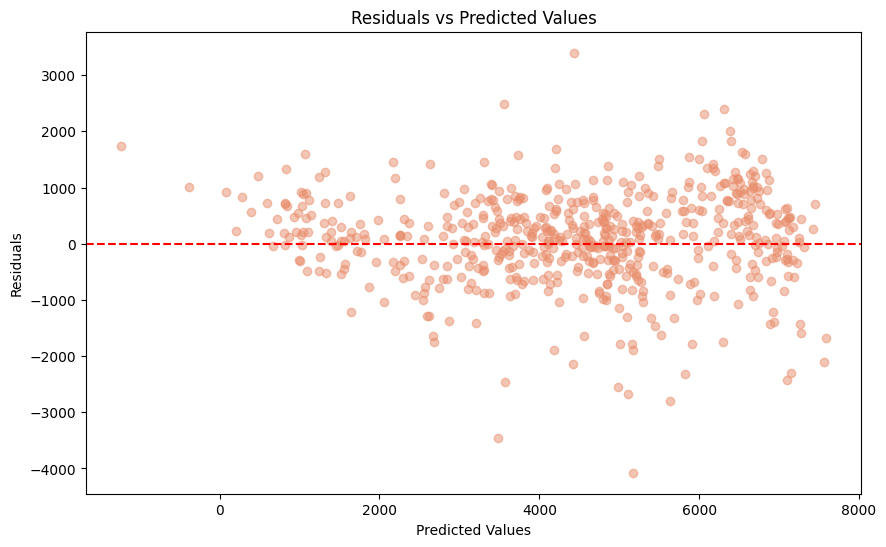

Error Metrics:
Training RMSE: 826.32
Testing RMSE: 763.76
Training MAE: 617.31
Testing MAE: 614.12


In [43]:


train_residuals = np.array(train_residuals)
test_residuals = np.array(test_residuals)

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Homoscedasticity plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



# Print error metrics
print("Error Metrics:")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Testing MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")

Inferences:

1. Residual Analysis (Homoscedasticity):


  - The residuals vs predicted values plot shows a relatively random scatter around zero line
  - More variability in predictions for higher rental numbers

2. Distribution of Residuals (Normality):


  - The histogram shows an approximately normal distribution
  - Most residuals fall between -2000 and +2000, suggesting reasonable prediction errors

3. Model Performance:


  - The model explains significant variance in both training and test sets
  - Lower RMSE on test set suggests good generalization (Train: 826.32, Test: 763.76)
  - Very close MAE values (difference of only ~3 bikes) Indicates consistent prediction accuracy across both sets
  - Difference of about 63 bikes between train and test indicates no overfitting



***Best Fit Line***

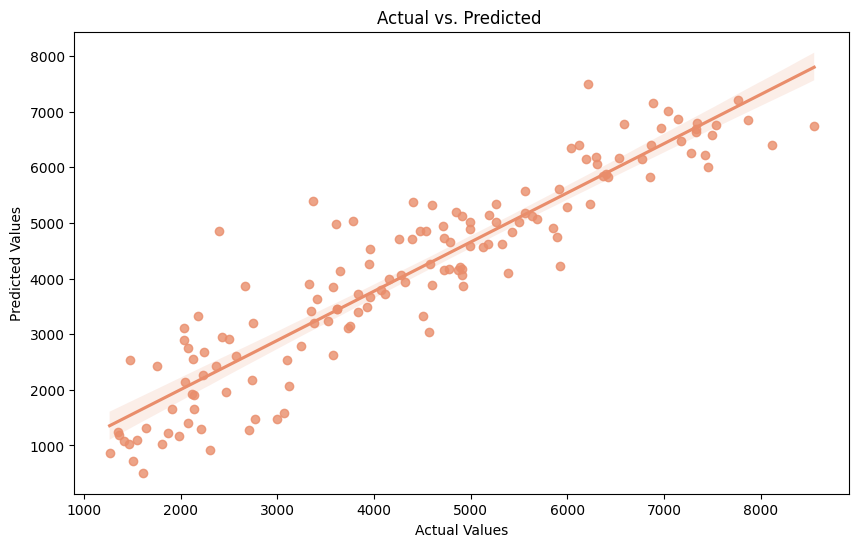

temp                          3520.22
const                         2589.97
yr                            2020.62
season_winter                  658.27
mnth_jul                      -541.96
holiday                       -595.20
mnth_dec                      -624.95
weathersit_mist               -638.64
mnth_nov                      -705.06
windspeed                    -1247.89
season_spring                -1254.90
weathersit_light_snow_rain   -2414.30
dtype: float64
3520.22 * temp + 2589.97 * const + 2020.62 * yr + 658.27 * season_winter + -541.96 * mnth_jul + -595.2 * holiday + -624.95 * mnth_dec + -638.64 * weathersit_mist + -705.06 * mnth_nov + -1247.89 * windspeed + -1254.9 * season_spring + -2414.3 * weathersit_light_snow_rain + 

<ipython-input-44-f367ff9492fe>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(plotcoeff[i],'*',plotcoeff.index[i],end ='')


In [44]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(10, 6))

sns.regplot(x=y_test.astype(float), y=y_test_pred.astype(float))
plt.title('Actual vs. Predicted ')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Cofficients = round(model_3.params,2)
plotcoeff = Cofficients.sort_values(ascending = False)
print(plotcoeff)
for i in range(0, len(plotcoeff)):
    print(plotcoeff[i],'*',plotcoeff.index[i],end ='')
    print(' + ',end ='')


Inferences:

Actual vs Predicted Plot:

Positive Impact Factors (in order of magnitude):

1) Temperature (3520.22):

    - Strongest positive impact on rentals
    - Each unit increase in temperature leads to ~3520 more rentals
    - Confirms temperature as crucial factor for business


2) rentals (2589.97):

    - Indicates baseline demand

3) Year (2020.62):

    - Strong positive yearly growth
    - Indicates growing business

4) Winter season (658.27):

    - Surprisingly positive impact
    - Might indicate good winter activities or tourism

Negative Impact Factors (in order of magnitude):

1) Light snow/rain (-2414.30):

    - Strongest negative impact
    - Severe weather significantly reduces rentals

2) Spring season (-1254.90):

    - Negative impact possibly due to unpredictable weather conditions

3) Windspeed (-1247.89):

    - Strong negative impact

4) Other variations:

    - November (-705.06)
    - Mist (-638.64)
    - December (-624.95)
    - July (-541.96)
    - Shows seasonal  changes affect the rental demand

##Summary

**The equation of the best fit line is given by:**

****cnt = 2589.97 + 2020.62 x yr + 3520.22 x temp - 1247.89 x windspeed - 1254.90 x season_spring + 658.27 x season_winter - 2414.30 x weathersit_light_snow_rain - 624.95 x mnth_dec - 541.96 x mnth_jul - 705.06 x mnth_nov - 595.20 x holiday - 638.64 x weathersit_mist****


1) The close alignment of R² values between training (0.8211) and test (0.8296) sets with a small difference of 0.0085 indicates excellent generalization and no overfitting. The adjusted R² of 0.8176 confirms the model's accuracy

2) Bike demand is primarily influenced by:

    - Positive factors: temperature, yearly trend, winter season
    - Negative factors: adverse weather conditions, windspeed, specific months (November, December, July)

3) Key Features Impact:

    - Temperature (3520.22): Strongest positive influence
    - Year (2020.62): Shows significant growth trend
    - Weather conditions (-2414.30): Major negative impact during adverse conditions

4) The RMSE values (Training: 826.32, Testing: 763.76) and MAE values (Training: 617.31, Testing: 614.12) indicate consistent model performance across both datasets.

**Recommendations:**

1) Temperature-Based Strategy: Maximize operations during optimal temperature conditions

2) Weather Planning: Develop contingency plans for adverse weather conditions

3) Seasonal market Demand Captialization:

    - Capitalize on winter popularity
    - Address spring season challenges

4) Growth Planning: Leverage strong yearly growth trend for expansion

5) Operational Efficiency: Plan maintenance during predicted low-demand periods

6) Marketing Strategy:

    - Weather-based promotions
    - Season-specific campaigns
